# Predictive Modeling Example

## Step 1: Import a number of libraries that we expect to use

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2:  Define a hidden linear relationship/model

First let's define our relationship (normally, this is hidden, but since we are creating the data, we will need to identify this)

In [49]:
b0 = 0  # y intercept
b1 = -1 # slope for x1
b2 = 1 # slope for x2

## Step 3: Create input and output data using the model

Let's set the number of observations that we will synthesize...

In [50]:
sample_size = 1000

In [51]:
x1_mean = 0
x1_stdev = 10
x1 = np.round(np.random.normal(x1_mean, x1_stdev, sample_size),2)

x2_mean = 0
x2_stdev = 10
x2 = np.round(np.random.normal(x2_mean, x2_stdev, sample_size),2)

Once we have the X values (input), we can generate y values using our 'hidden' model...

In [52]:
y = b0 + b1*x1 + b2*x2

But, this is rather boring data to analyze, because the 'hidden' model is not really hidden at all...

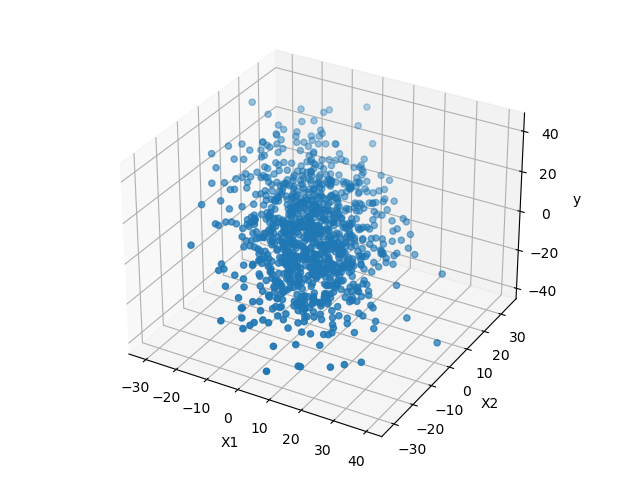

In [53]:
# this is a notebook 'MAGIC' that will allow for creation of interactive plot
%matplotlib widget 

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, y)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

%matplotlib inline

## Step 4: Add some random noise to 'hide' the model

Now, let's obscure the model by adding noise to the data by adding errors that are randomly selected from a norma distribution

In this notebook we are increasing amount of noise where we increased the values of mean to 100 and standard deviation value to 50 whereas in the original they are only 0 and 10 in the data and we will analyse the results by comparing these to original results.

In [54]:
e_mean = 100
e_stdev = 50
e = np.round(np.random.normal(e_mean, e_stdev, sample_size), 2) # round to two decimal places
y = y + e

## Step 5: Explore the resulting synthesized data

Now, let's look at a scatter plot of both the X and y data with the noise added in...

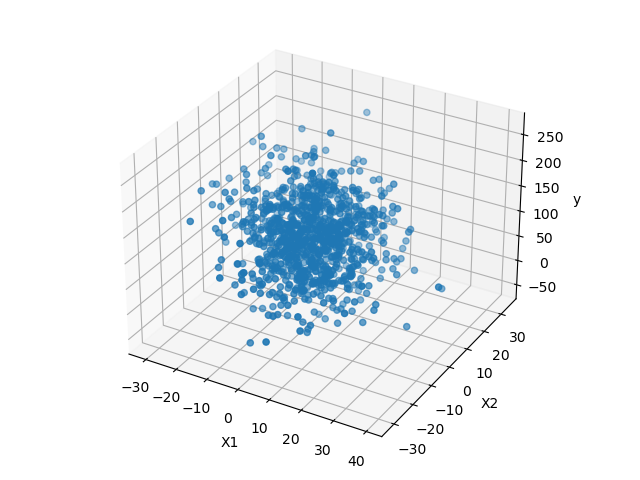

In [55]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, y)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

### Step 6: Create a pandas data frame from the data

Since our goal is to generate data that we can analyze with another notebook (for practice), let's save this data to a csv. 

First we will create a dataframe with the data we just similated...

In [56]:
df = pd.DataFrame({'x1': x1, 'x2' : x2, 'target': y})
df

,x1,x2,target
0,16.24,-1.53,106.71
1,-6.12,-24.33,93.73
2,-5.28,5.08,87.95
3,-10.73,-3.24,76.95
4,8.65,-15.11,-25.26
...,...,...,...
995,-1.16,1.89,64.46
996,-22.77,5.61,97.25
997,-0.70,-9.22,83.95
998,3.54,6.47,32.93


## Step 7: Save the data frame contents to a csv

Lastly, let's save the data we created to a csv file. This saved data will be used to practice finding hidden relationships in data.

In [57]:
df.to_csv('noise_c02_dataset_2.csv', index=False)

We will make use of the dataset generated when we increased the noise and observe the results

## Step 1: Import the libraries we will use in this notebook

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(1) # set this to ensure the results are repeatable. 

%matplotlib widget 

## Step 2: Load the given data that we will model

In [59]:
df = pd.read_csv('noise_c02_dataset_2.csv')

df.head(3)

,x1,x2,target
0,16.24,-1.53,106.71
1,-6.12,-24.33,93.73
2,-5.28,5.08,87.95


Seperate out the input m(X) and the target (y)

In [60]:
X = df[['x1', 'x2']]
y = df[['target']]

For educational purposes, let's look at the first five values in X and y (note how X is an array of lists)

## Step 3: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

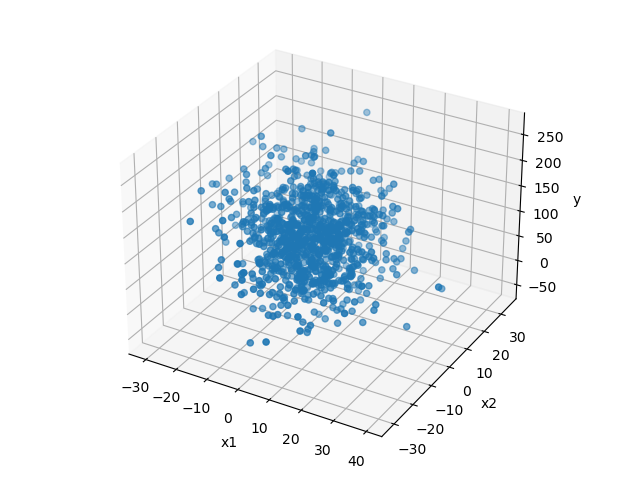

In [61]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['x1'], df['x2'], y)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

## Step 4: Fit the model

Fit the linear regression model to the dataset

In [62]:
lin_reg = LinearRegression().fit(X,y)

## Step 5: Analyze the linear regression model's performance

Visualize the linear regression model results

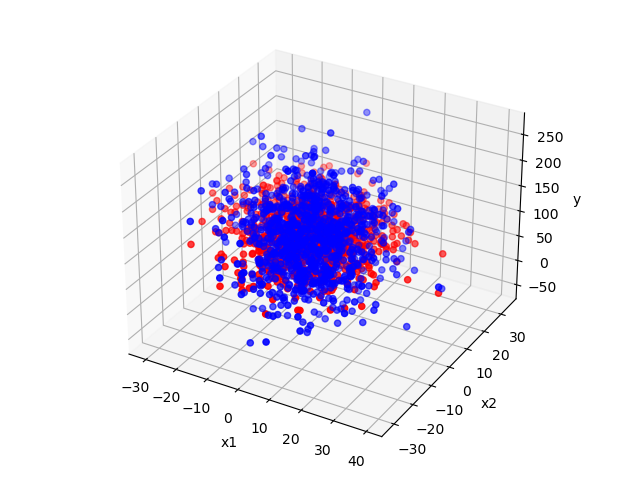

In [63]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X['x1'], X['x2'], y, color='blue')
ax.scatter(X['x1'], X['x2'], lin_reg.predict(X), color='red')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

... using fstring formatting, we can display these values as follows...

In [64]:
b0 = lin_reg.intercept_[0]
b1 = lin_reg.coef_[0][0]
b2 = lin_reg.coef_[0][1]
r2 = lin_reg.score(X, y)

print(f"Y = {b0:.2f} + {b1:.2f}x1 + {b2:.2f}x2")
print(f"R^2: {r2:.3f}")

Y = 99.03 + -1.25x1 + 0.85x2
R^2: 0.086


As noise is added to the data, this resulted in the decrease in the model fit and we can clearly observe that value of  R-squared is dropped drastically to 0.086 when compared with the original value which is 0.682. This indicates that it had become more difficult for the model to accurately capture the underlying relationship between the variables which can lead to less precise results.